# **Exploratory Data Analysis(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/raphael/Code/Capstone-E-Commerce-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/home/raphael/Code/Capstone-E-Commerce-Analysis'

# Section 1

Section 1 content

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("dataset/sales.csv")

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [30]:
df["Revenue"] = df["Price"] * df["Quantity"]
df['InvoiceDate_Year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_Month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_Day'] = df['InvoiceDate'].dt.day

In [28]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824293 entries, 0 to 824292
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824293 non-null  object        
 1   StockCode    824293 non-null  object        
 2   Description  824293 non-null  object        
 3   Quantity     824293 non-null  int64         
 4   InvoiceDate  824293 non-null  datetime64[ns]
 5   Price        824293 non-null  float64       
 6   Customer ID  824293 non-null  int64         
 7   Country      824293 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 50.3+ MB


In [25]:
country_transactions = df.groupby('Country')['Invoice'].nunique()
country_transactions = country_transactions.sort_values(ascending=False)
country_percent = country_transactions / country_transactions.sum() * 100

country_percent

Country
United Kingdom          90.260753
Germany                  2.440383
France                   1.644752
EIRE                     1.620236
Netherlands              0.554936
Spain                    0.418988
Belgium                  0.407845
Sweden                   0.285269
Portugal                 0.271897
Switzerland              0.267439
Australia                0.260753
Italy                    0.205037
Channel Islands          0.176064
Finland                  0.151549
Japan                    0.124805
Denmark                  0.118119
Norway                   0.118119
Austria                  0.113662
Cyprus                   0.100290
Poland                   0.084689
USA                      0.055717
Greece                   0.046802
Unspecified              0.042345
Malta                    0.035659
United Arab Emirates     0.031201
Singapore                0.031201
Canada                   0.017829
Israel                   0.017829
Iceland                  0.017829
Lithua

This tells us that majority of the customers come from the United Kingdom, which makes sense as the company is based and registered in the same country.

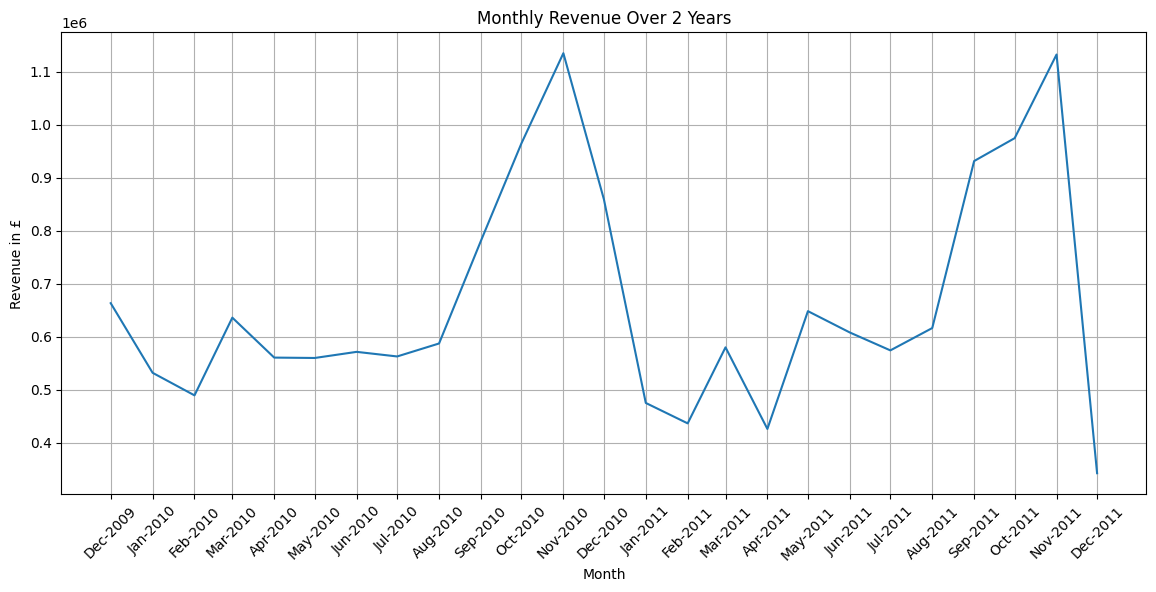

In [34]:
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

monthly_revenue.index = monthly_revenue.index.to_timestamp()

month_labels = monthly_revenue.index.strftime('%b-%Y') 

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Over 2 Years')
plt.xlabel('Month')
plt.ylabel('Revenue in £')
plt.grid(True)

# Set x-axis labels
plt.xticks(ticks=monthly_revenue.index, labels=month_labels, rotation=45)

plt.show()

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)